Codigo que realiza uma analise exploratória de dados do conjunto load_breast_cancer do scikitlearn com estatisticas gerais

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Estatísticas descritivas gerais
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
# Distribuição dos dados por target (0 para maligno, 1 para benigno)
malignant_df = df[df['target'] == 0]
benign_df = df[df['target'] == 1]

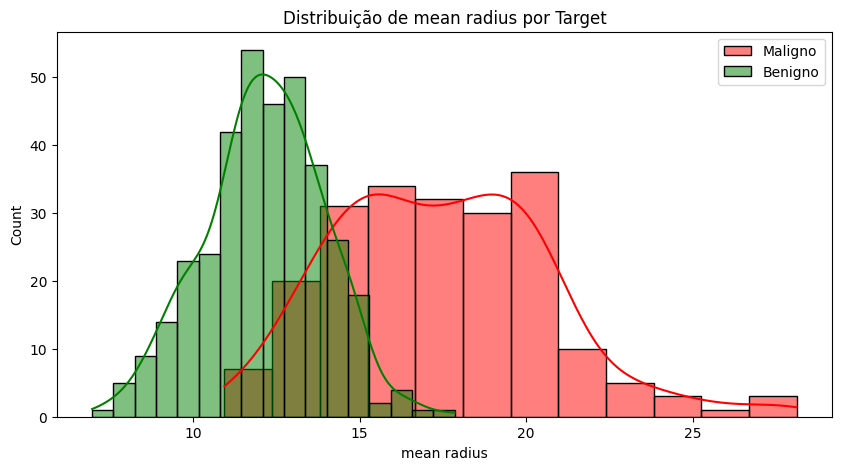

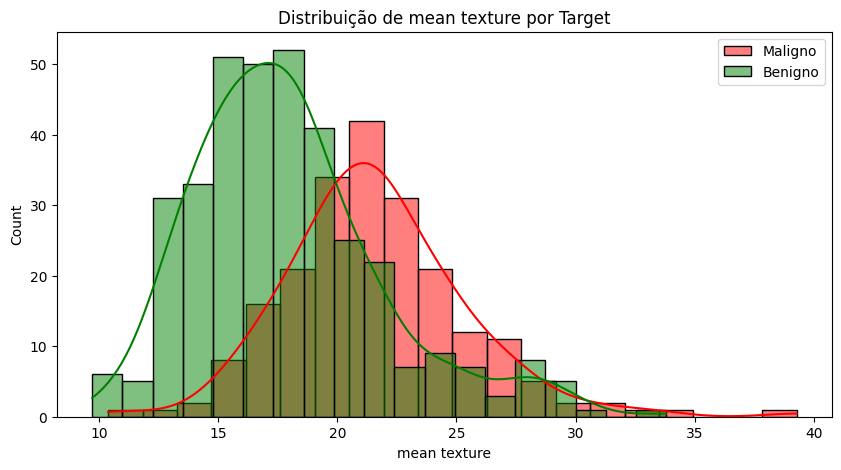

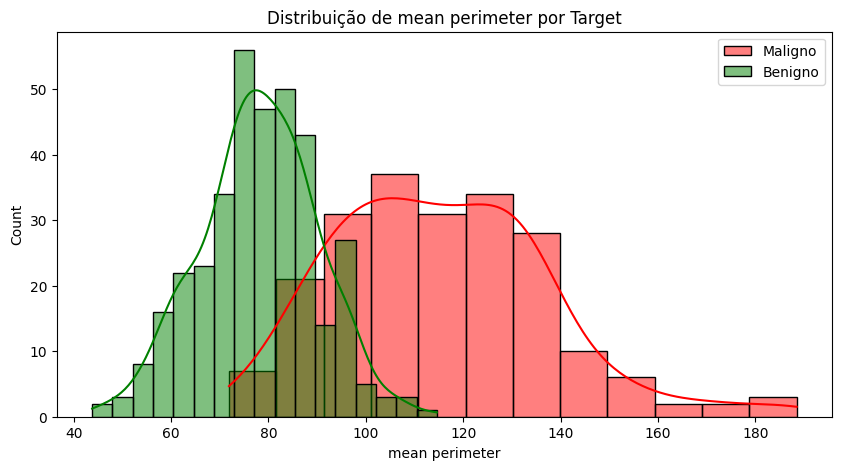

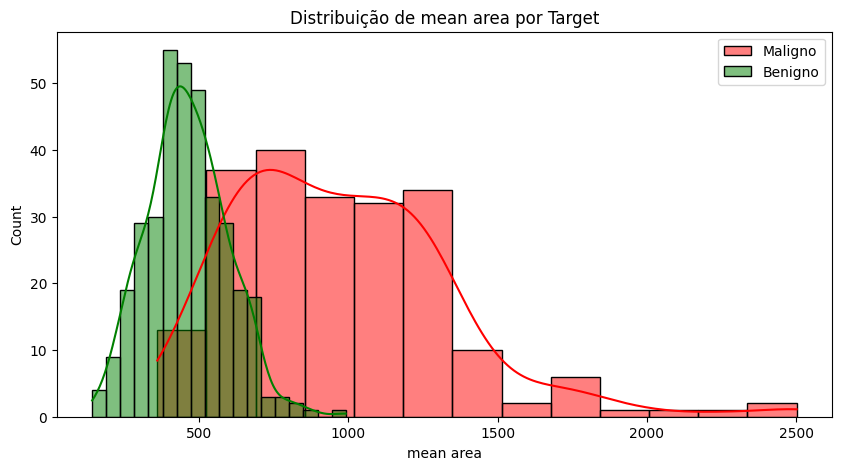

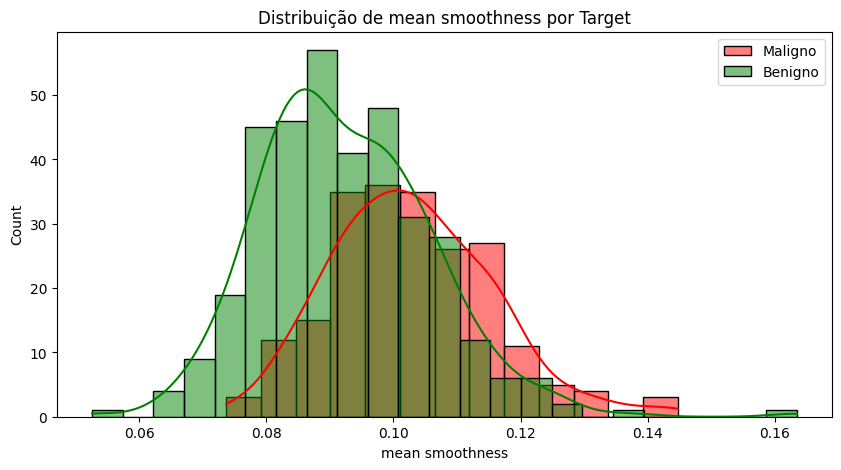

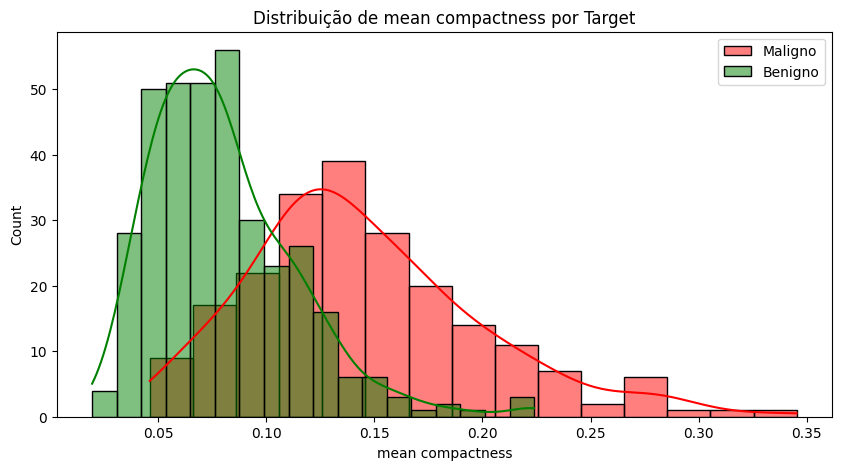

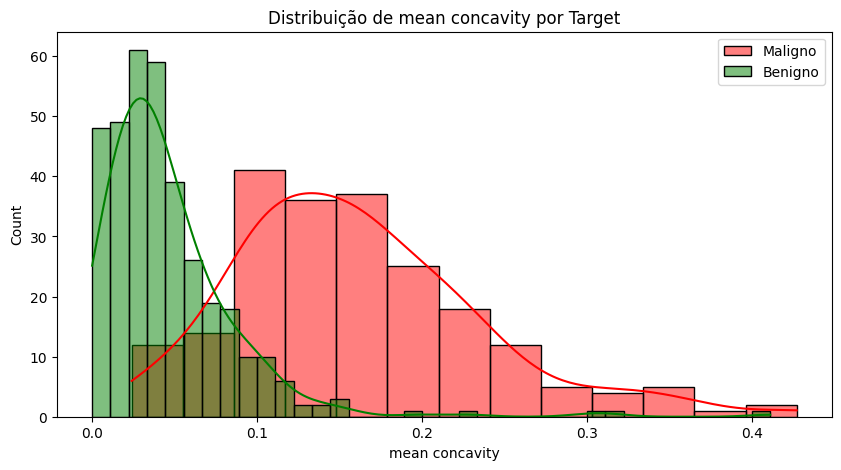

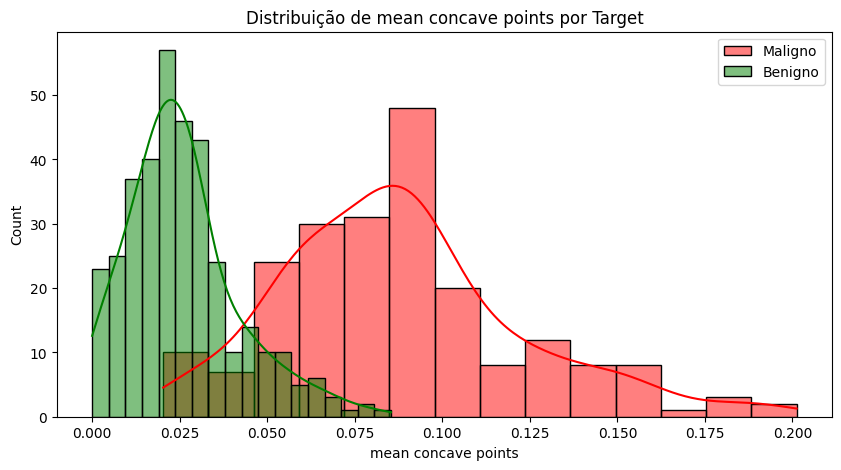

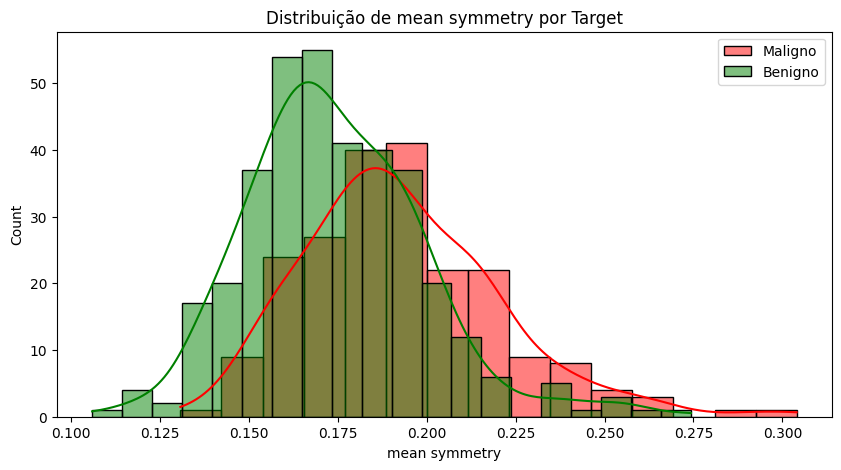

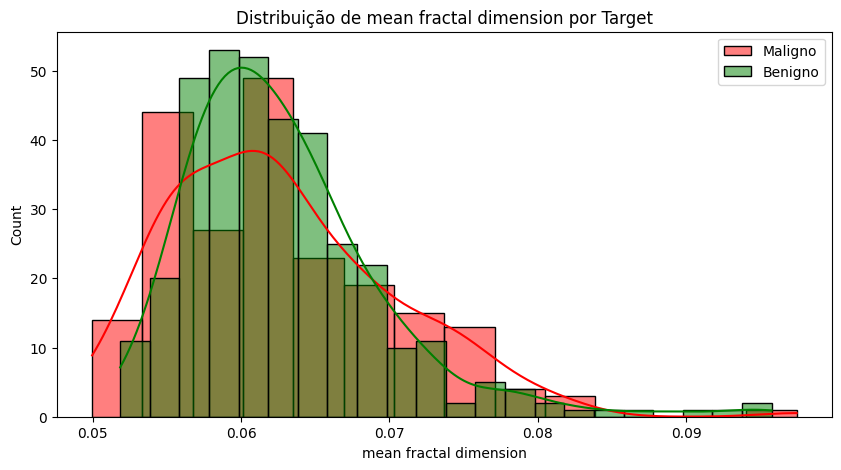

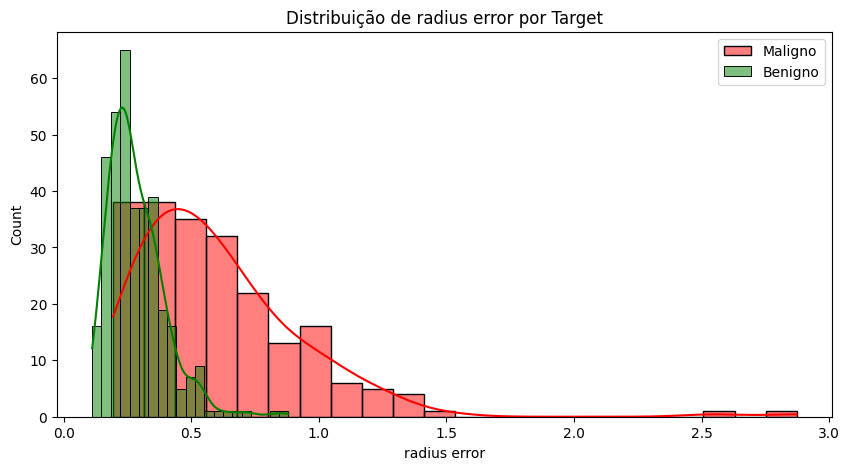

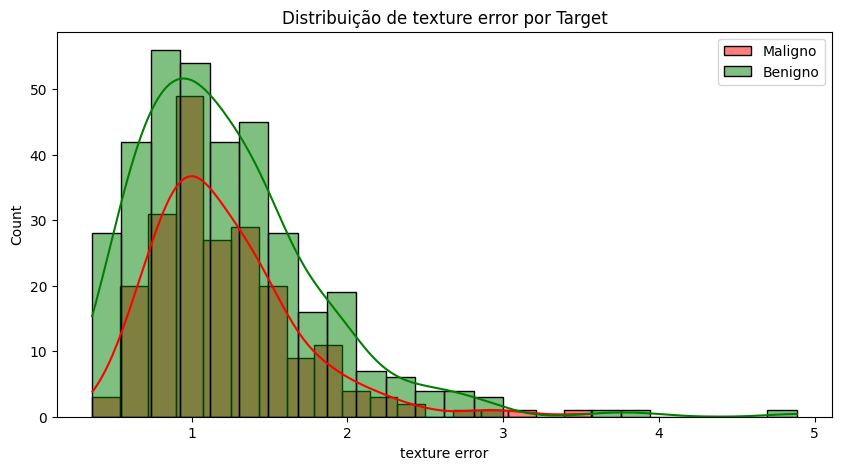

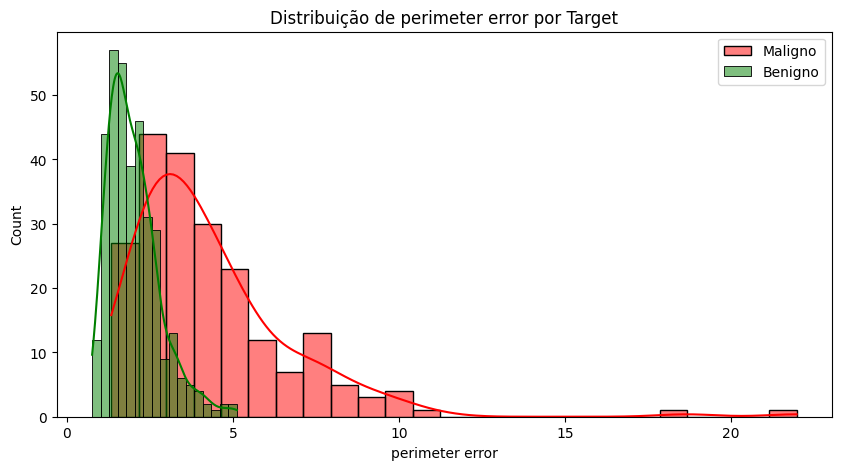

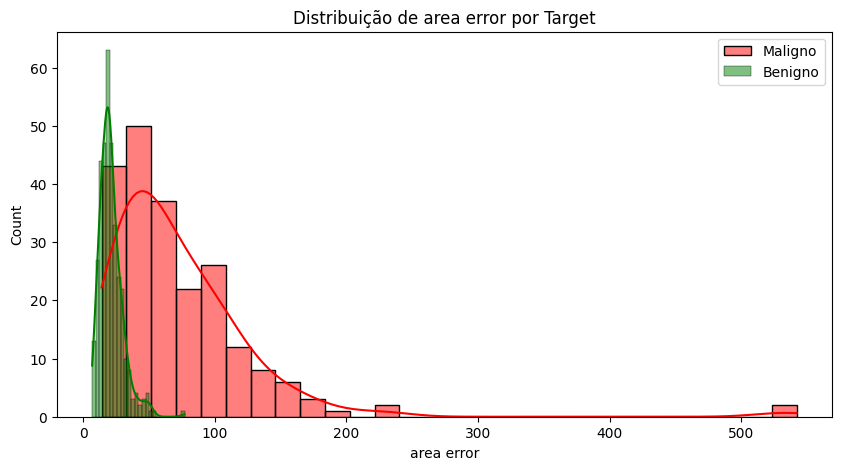

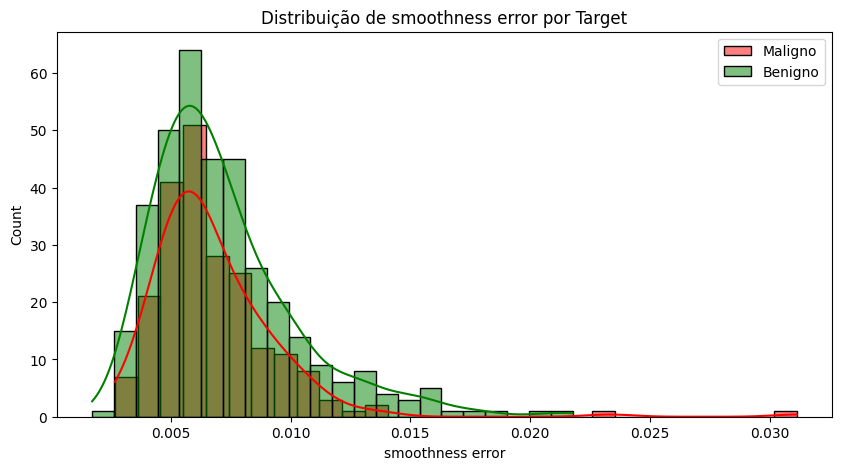

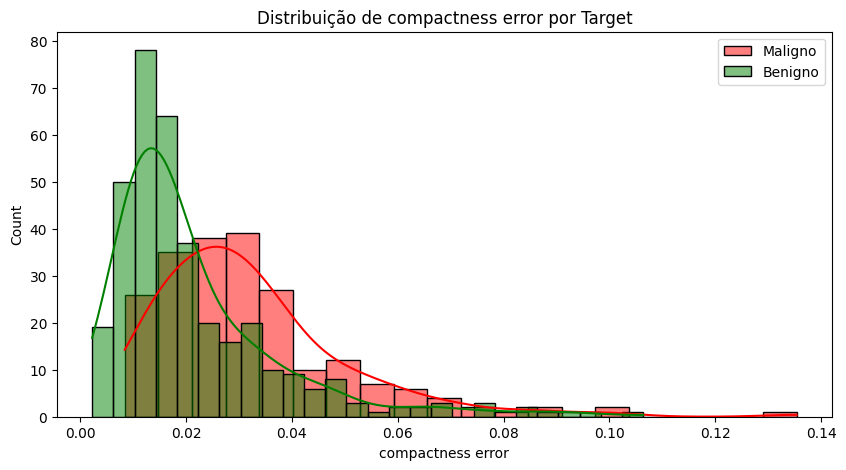

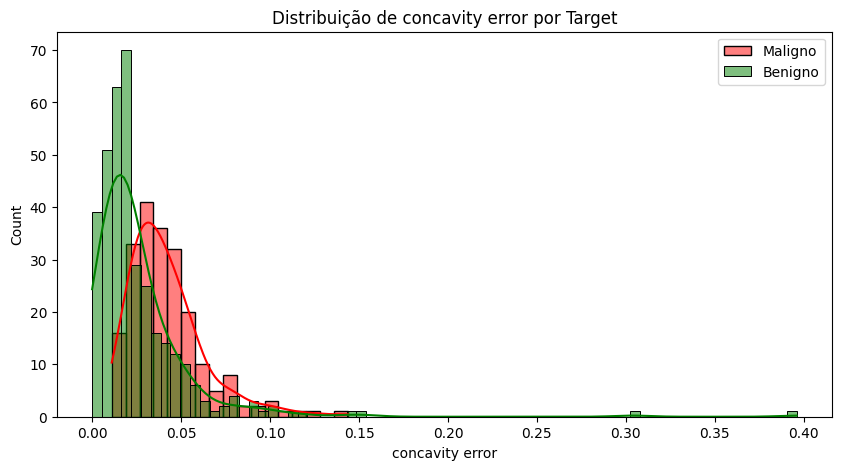

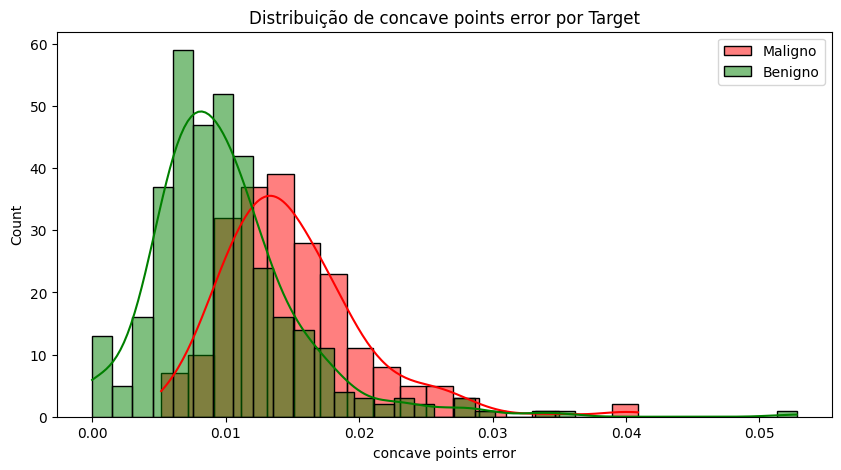

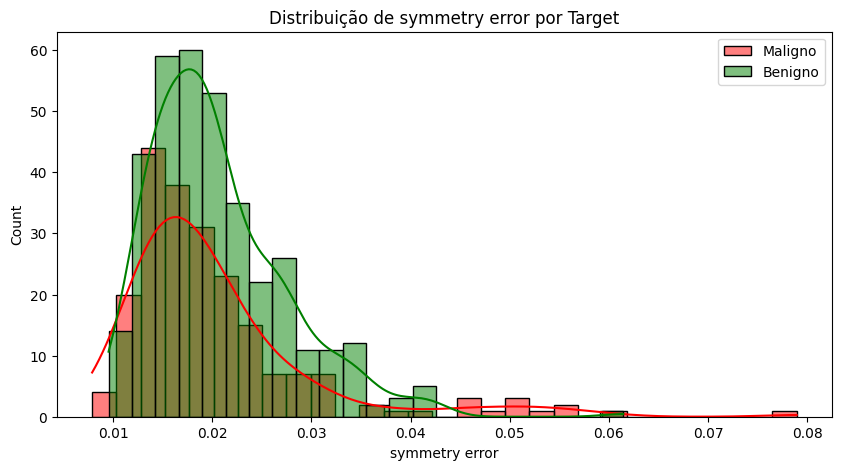

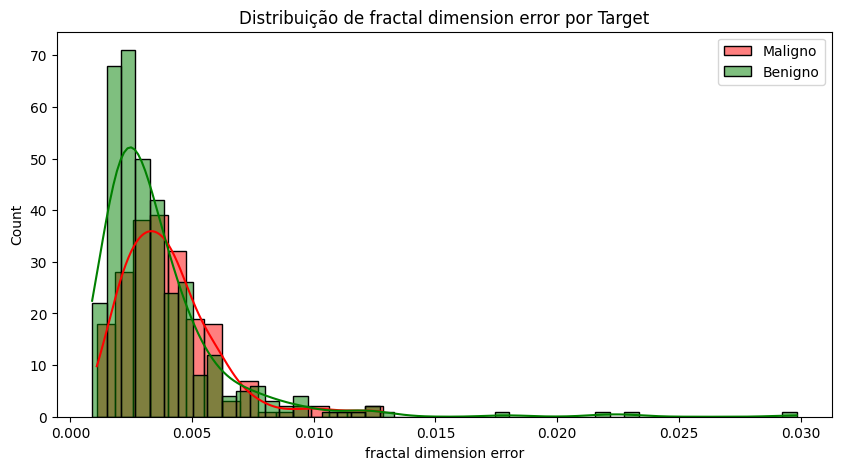

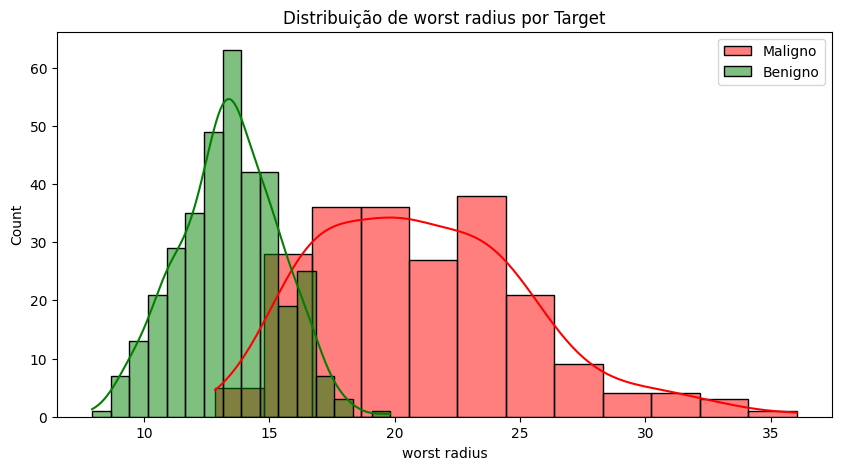

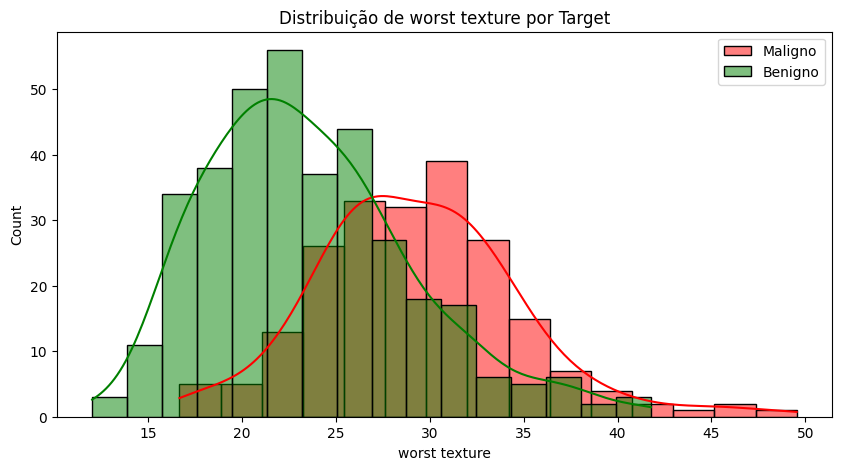

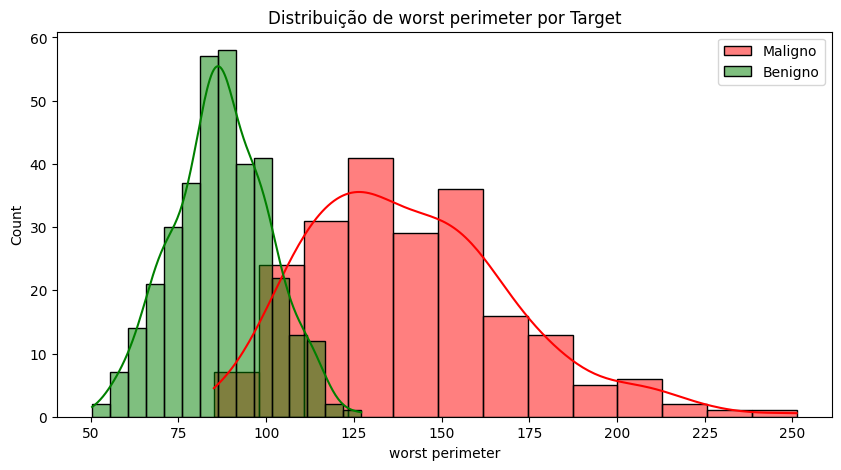

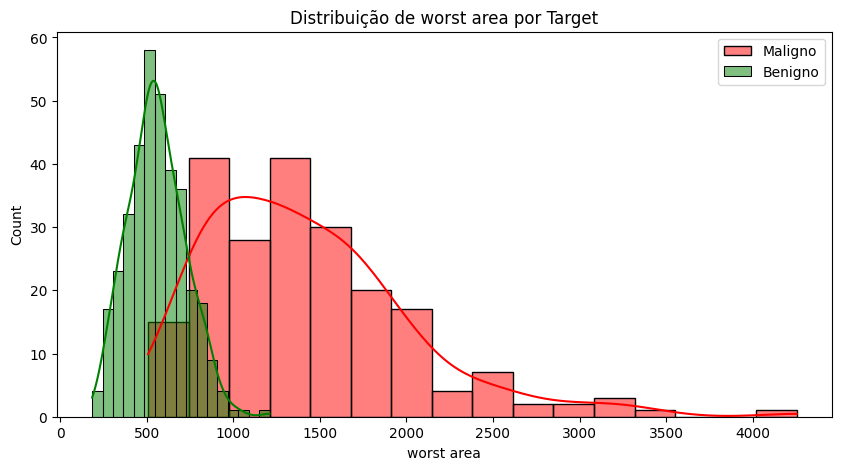

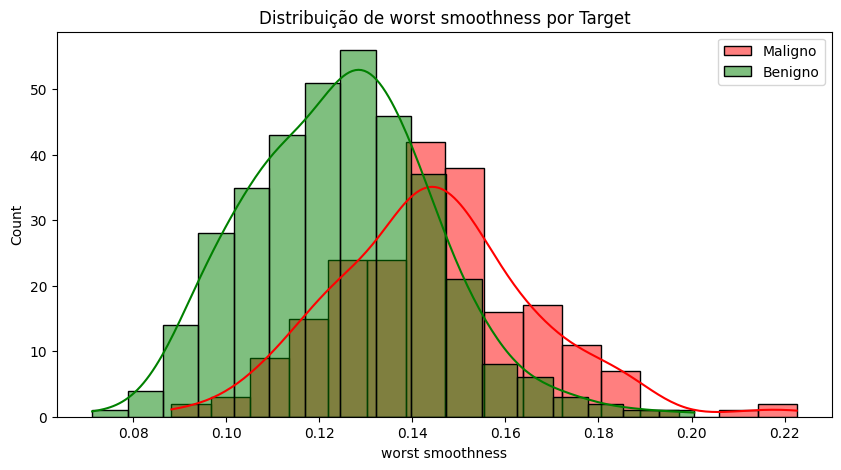

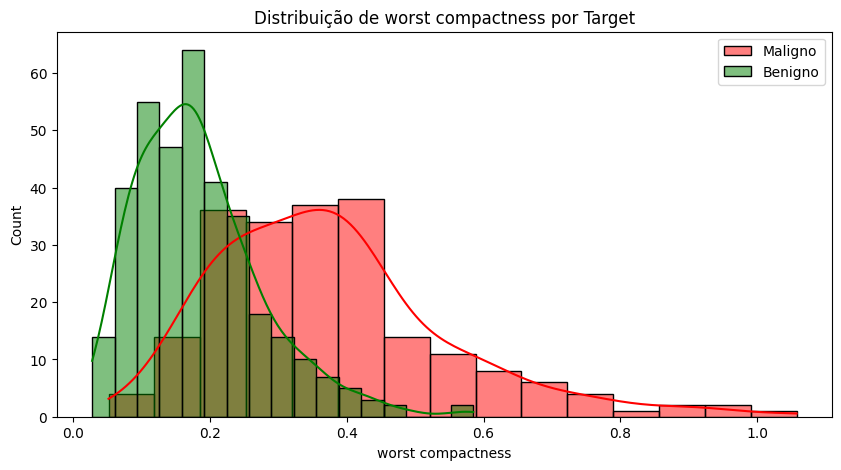

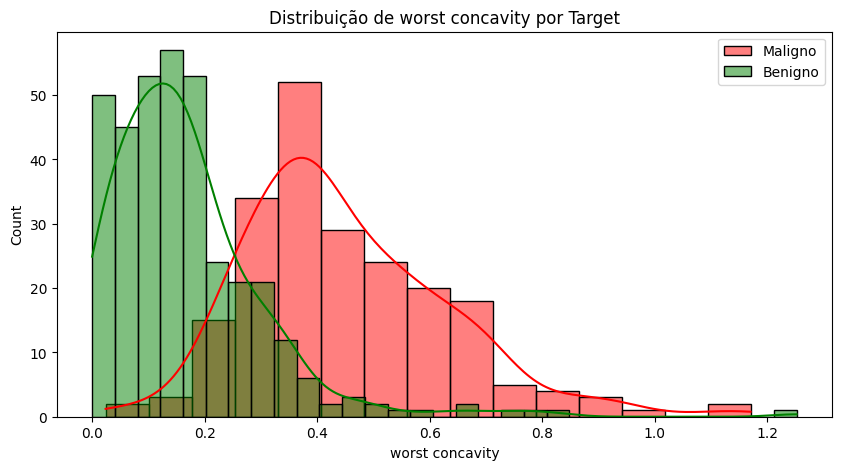

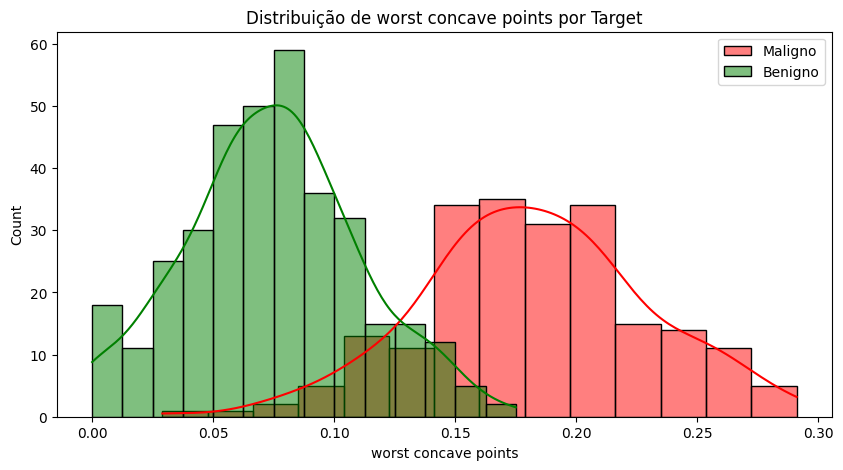

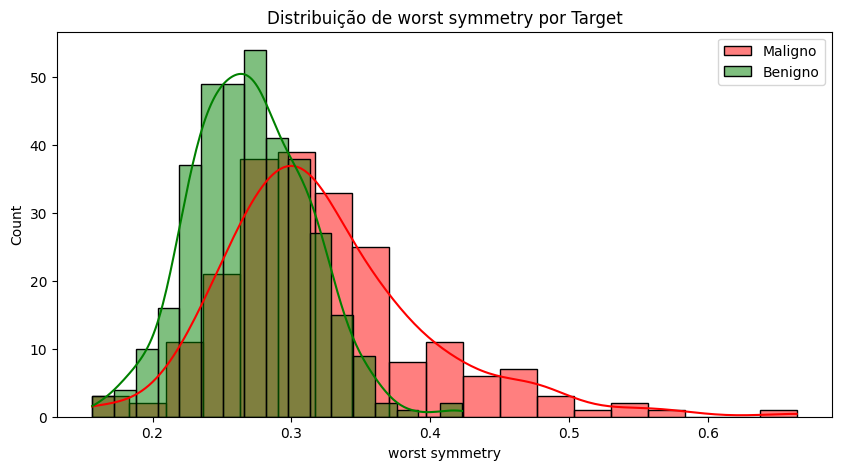

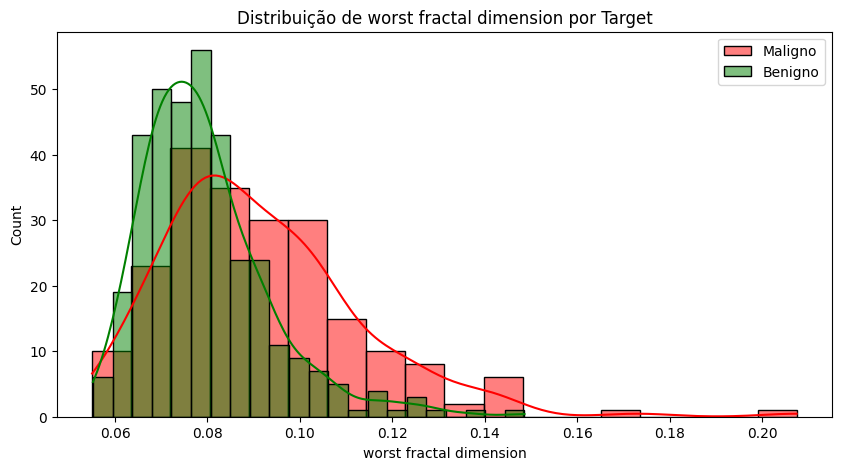

In [6]:
# Analisando a diferença na distribuição das características
features = df.columns[:-1] # Excluindo a coluna target
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(malignant_df[feature], kde=True, label='Maligno', color='red', alpha=0.5)
    sns.histplot(benign_df[feature], kde=True, label='Benigno', color='green', alpha=0.5)
    plt.title(f'Distribuição de {feature} por Target')
    plt.legend()
    plt.show()

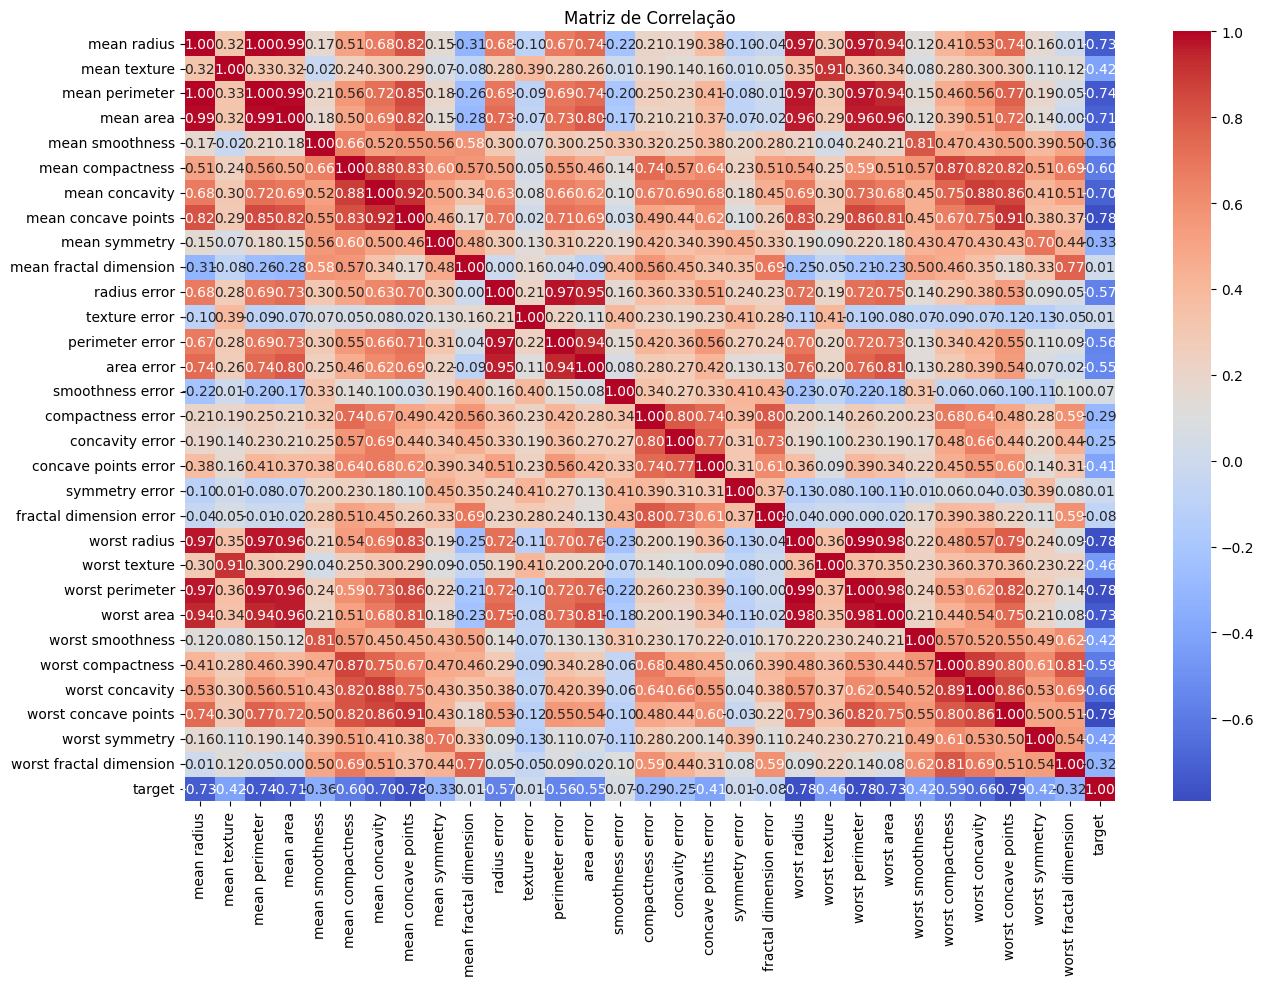

In [7]:
# Matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

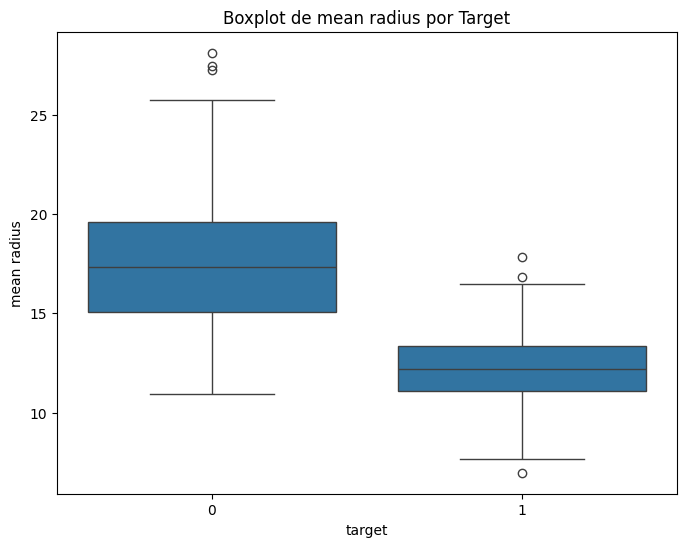

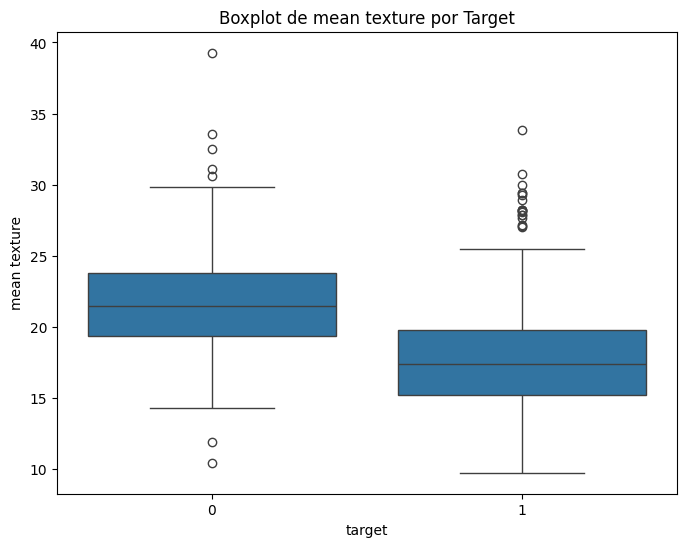

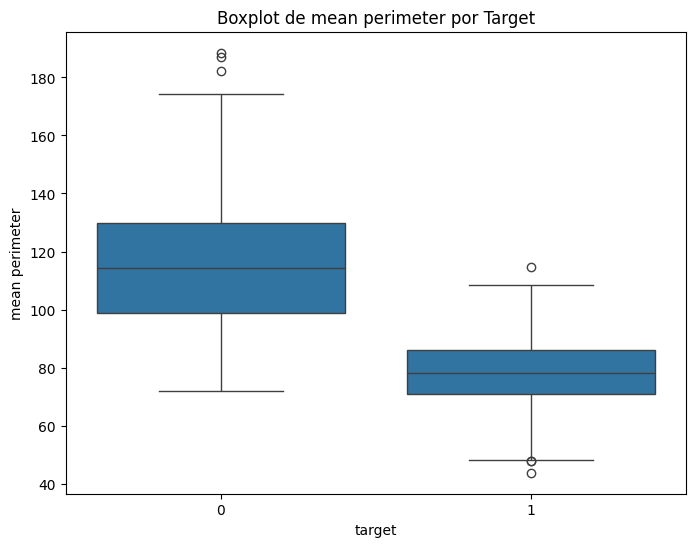

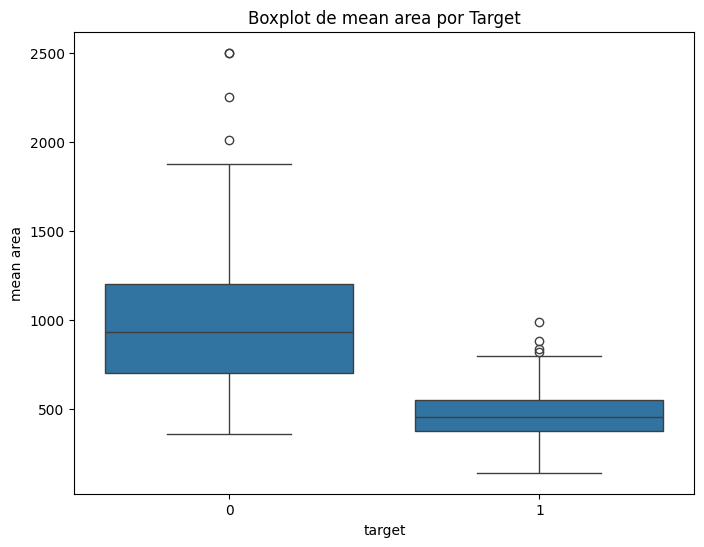

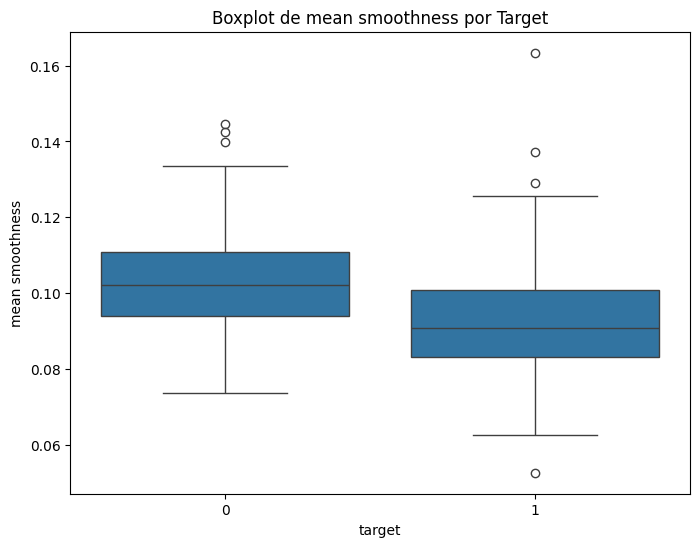

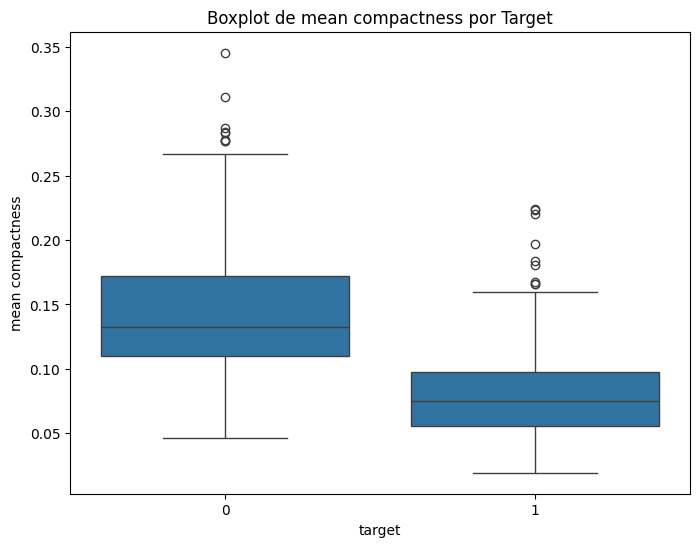

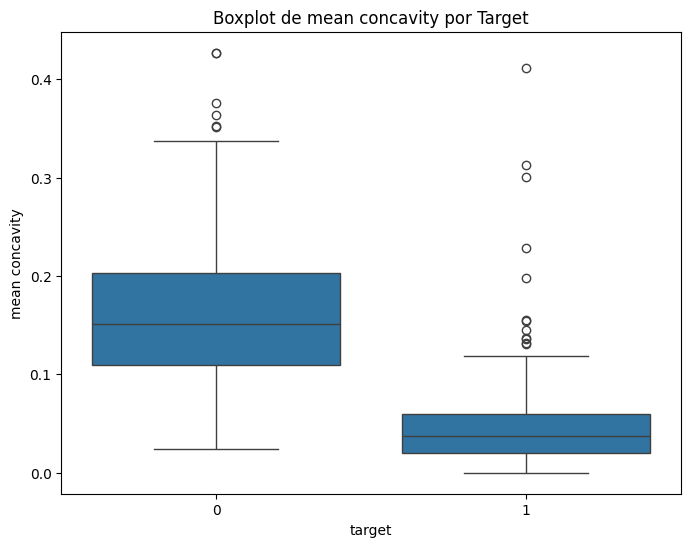

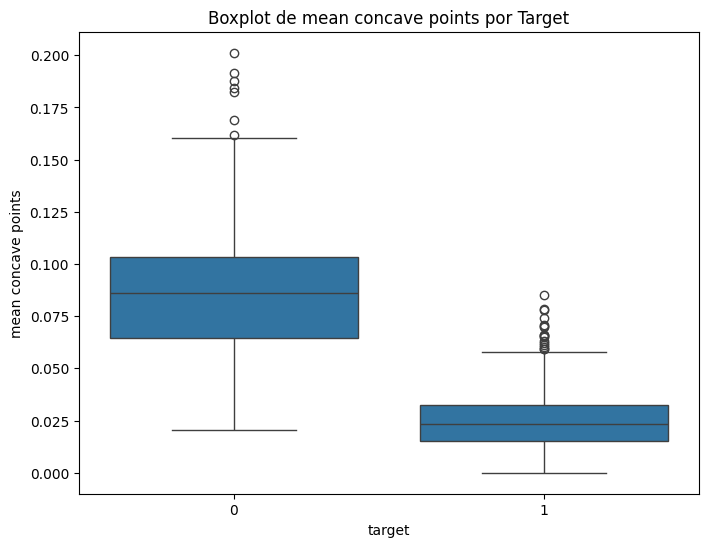

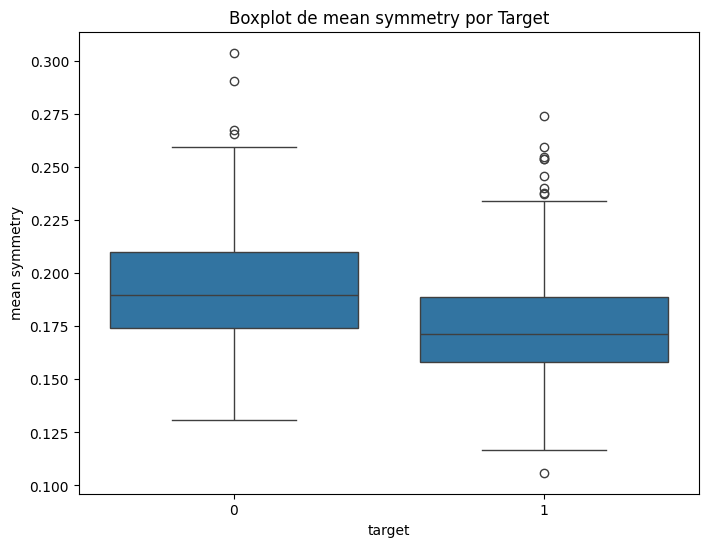

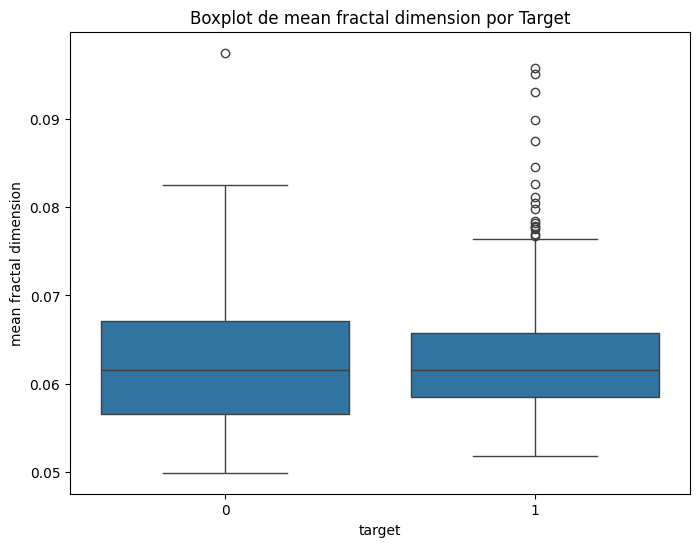

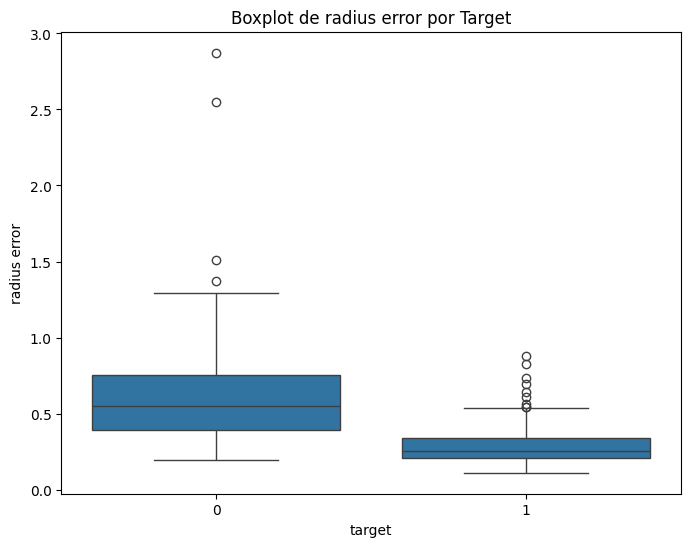

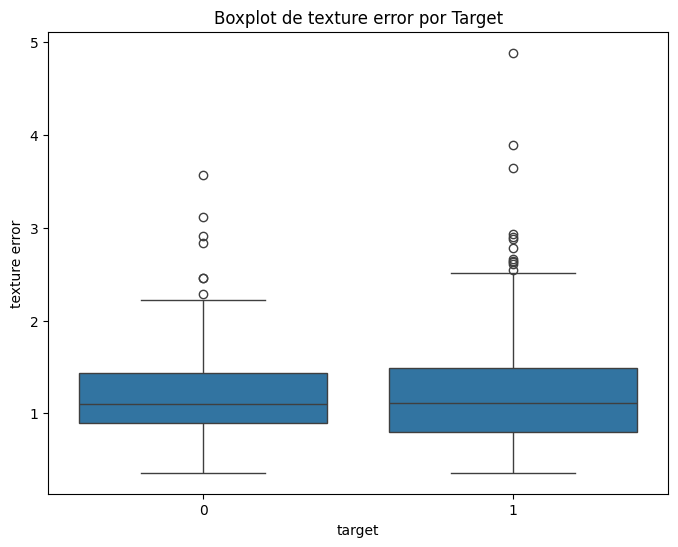

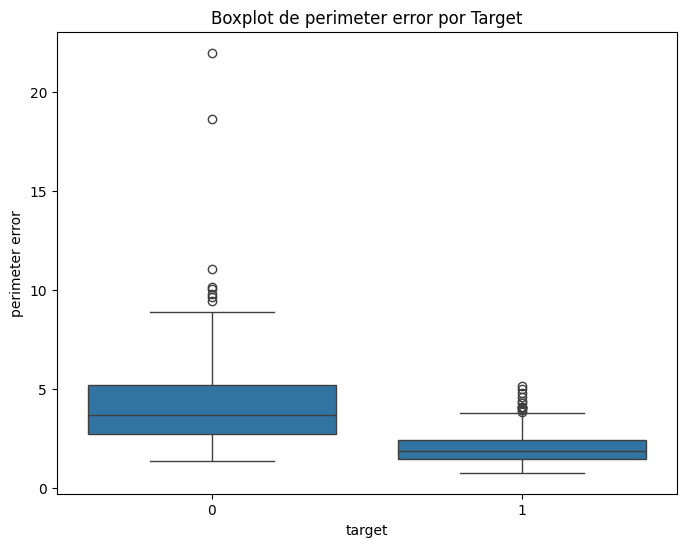

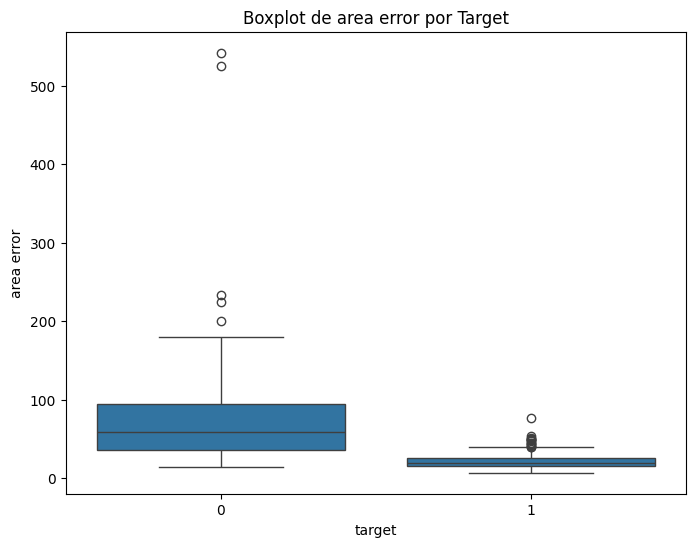

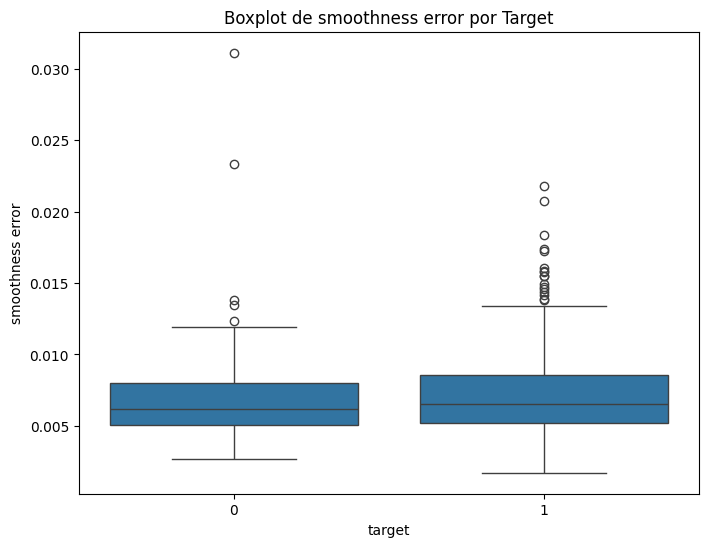

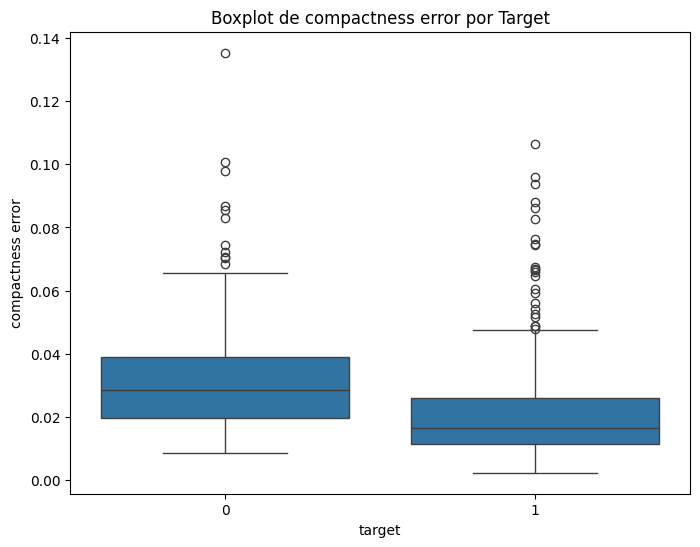

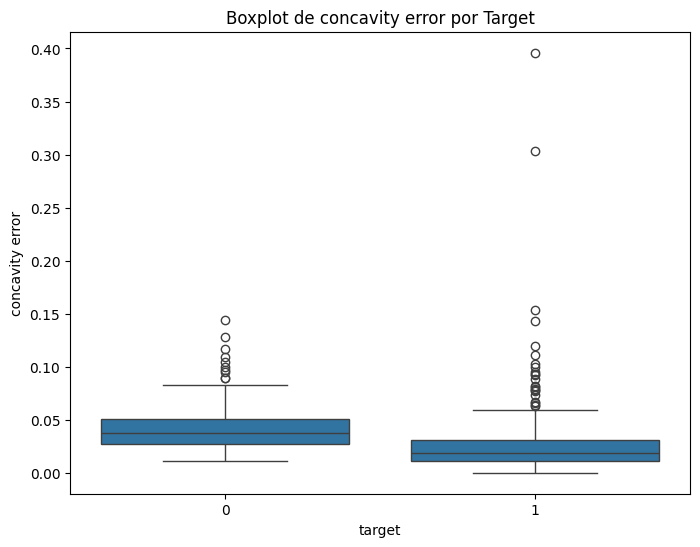

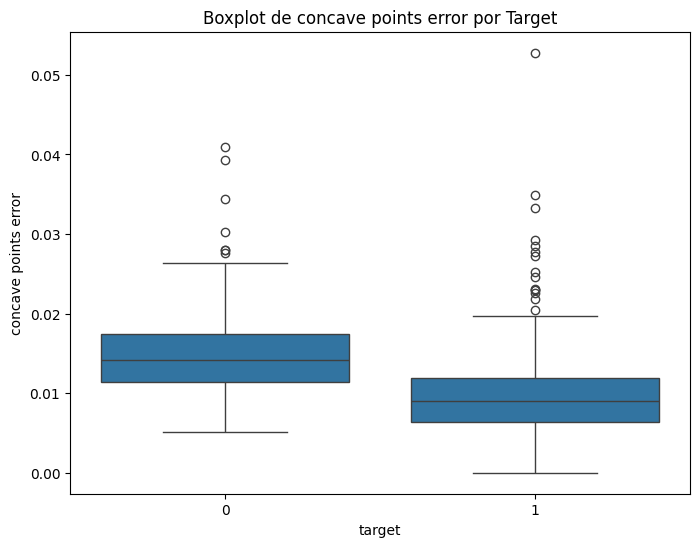

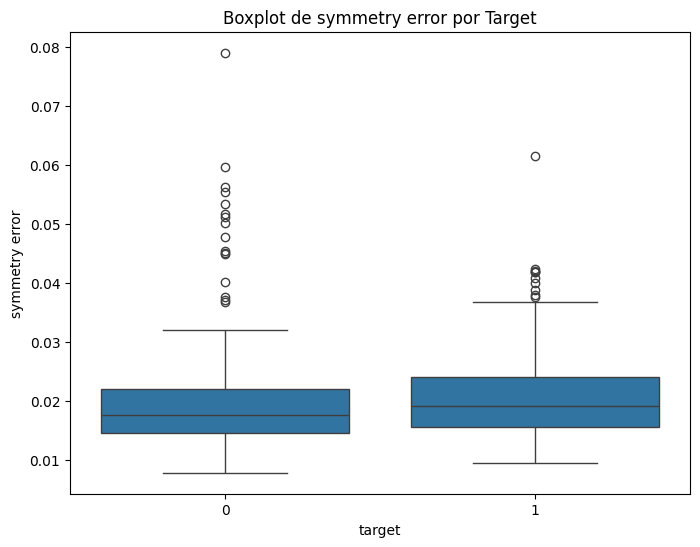

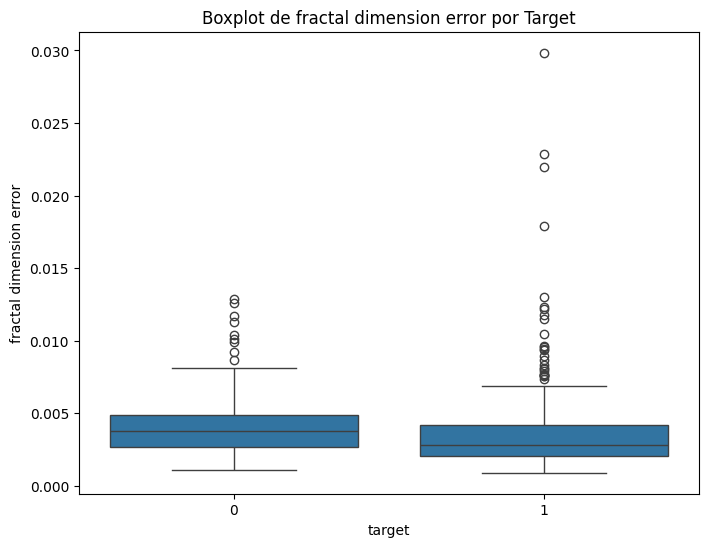

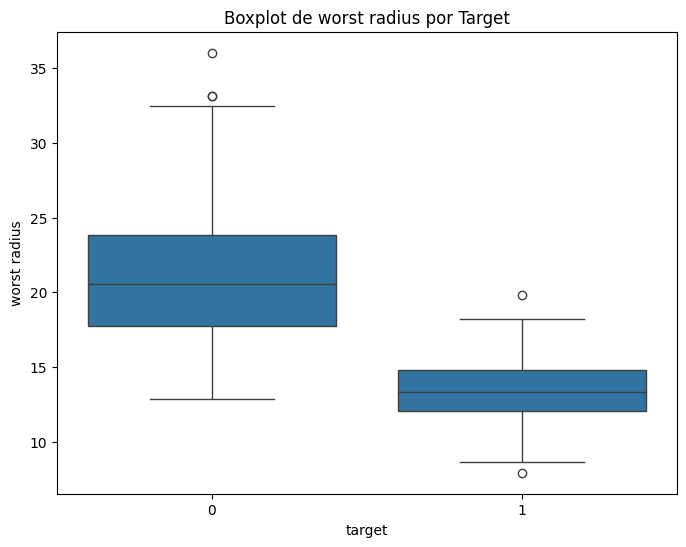

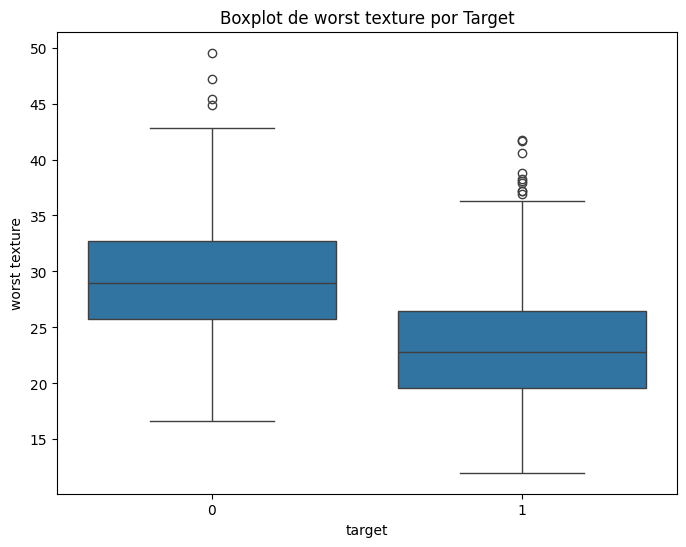

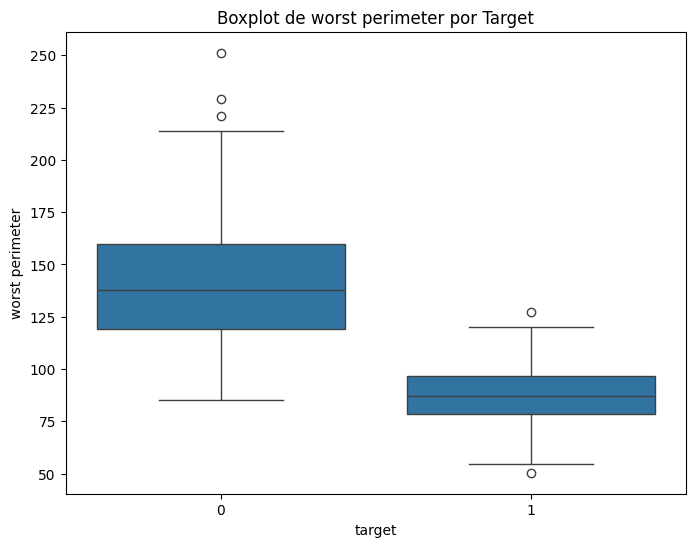

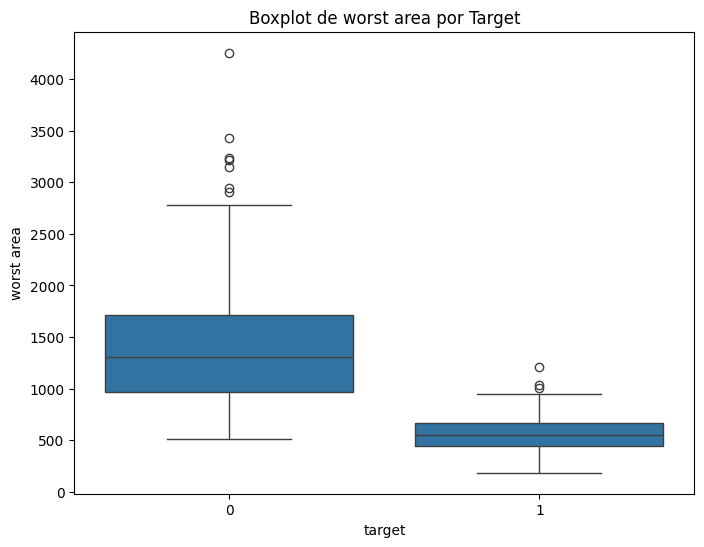

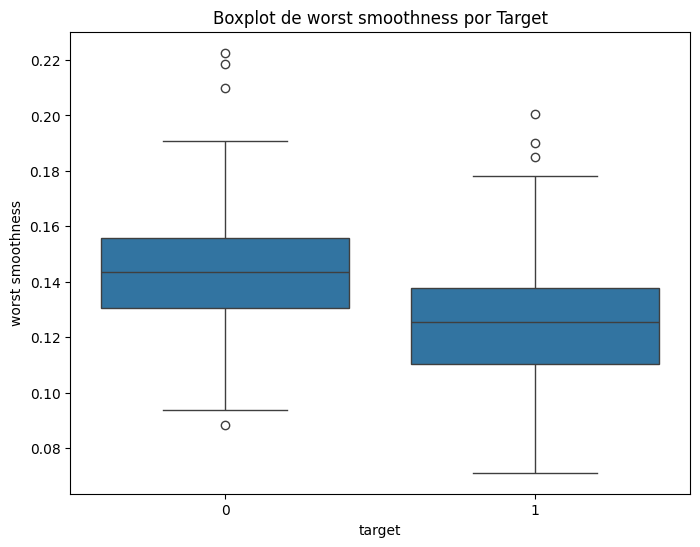

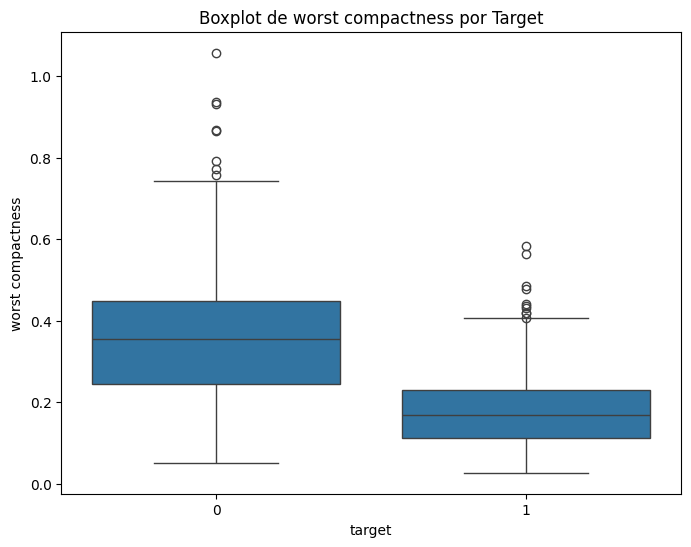

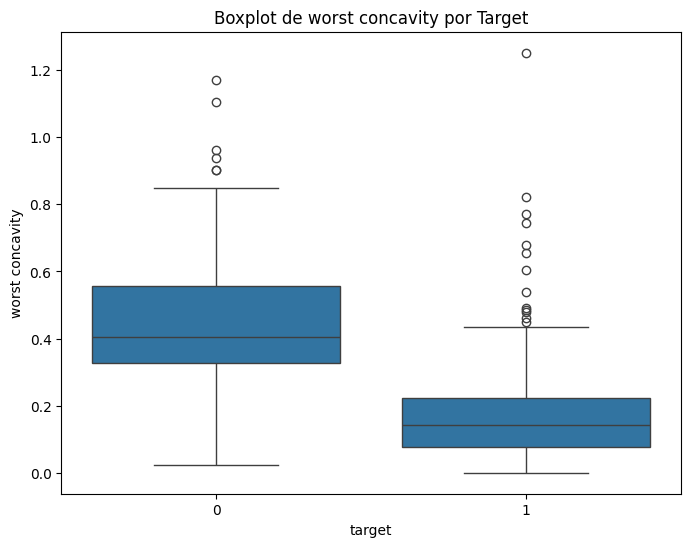

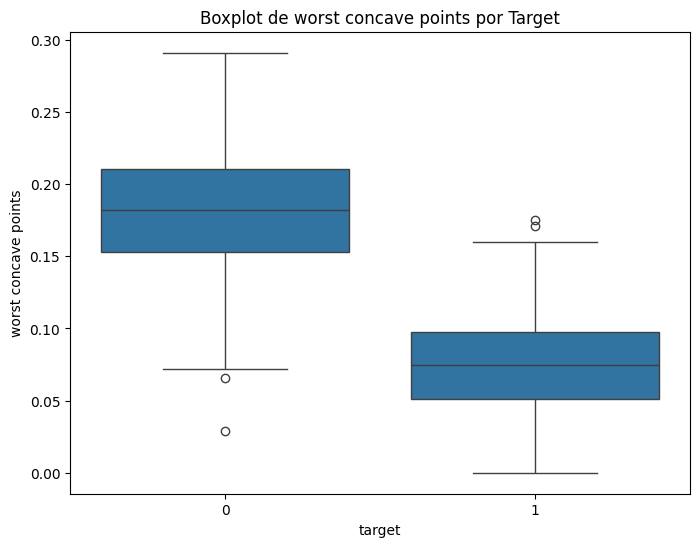

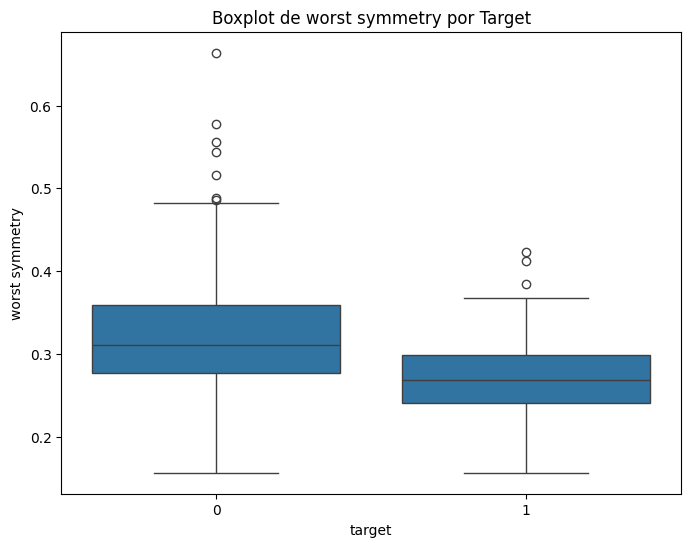

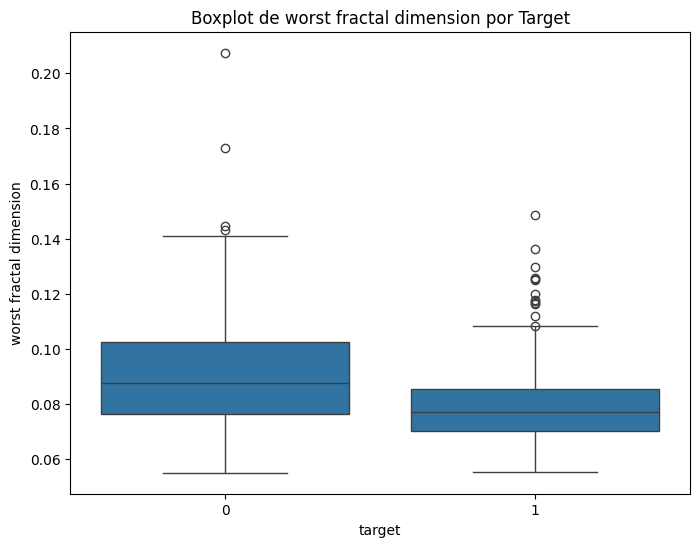

In [8]:
# Boxplots para visualizar a distribuição e outliers
for feature in features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='target', y=feature, data=df)
  plt.title(f'Boxplot de {feature} por Target')
  plt.show()

Modelo preditivo de árvore de decisão para prever target avaliando o modelo a partir da acurácia usando validação cruzada

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Carregando o dataset (código anterior)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [8]:
# Separando features e target
X = df.drop('target', axis=1)
y = df['target']

In [9]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Criando e treinando o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [15]:
# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Validação cruzada
scores = cross_val_score(model, X, y, cv=5) # 5 folds
print(f"Acurácia com validação cruzada (5 folds): {scores.mean():.2f}")

Acurácia do modelo: 0.95
Acurácia com validação cruzada (5 folds): 0.92
